In [64]:
main_dir = '/Users/matin/Downloads/testProjs/intracellular_M'
import sys
sys.path.insert(0,main_dir)
import numpy as np
import json
import matplotlib.pyplot as plt
import tellurium as te
import os
%load_ext autoreload
%autoreload
%matplotlib inline 
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
%config Completer.use_jedi = False
showOriginalModelString = True


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'kd_ikb_d': 88.94880453426998, 'n_ikb_d': 23.432448813190682, 'kd_ikb_p': 1.2079960347701189, 'n_ikb_p': 29.5215204261909}
t2m: 1 
error is  0.00635148487688042
P4 is plotting


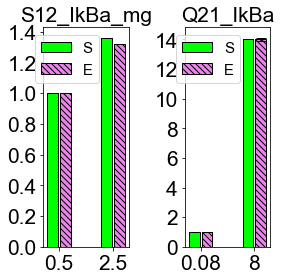

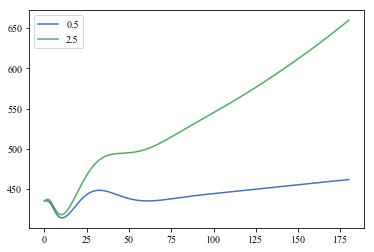

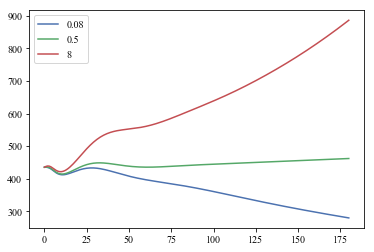

In [105]:
###----sim vs obs-----###
%load_ext autoreload
%autoreload
from data.observations import observations,t2m,select_obs
from models.params import fixed_params
from tools import dirs, tools
from models.models import Macrophage
params = {**fixed_params}
if True: # apply inferred params
    target_package = 'P4'
    with open(os.path.join(dirs.dir_outputs,'inferred_params_{}.json'.format(target_package)),'r') as file:
        inferred_params = json.load(file)
    params = {**params,**inferred_params}
print(params)
print('t2m: {} '.format(t2m))
flags = {
    'P1_3': False,
    'P4': True
}
for key,value in flags.items():
    if key == 'P1_3' and value : 
        from plots import funcs
        model_sbml = te.loadSBMLModel(dirs.dir_M1_model)
        macrophage_obj = Macrophage(dir_model = dirs.dir_M1_model)
        print('P1_3 is plotting')
        funcs.P1_3_eq_plot(model_sbml=model_sbml,params=params,observations=observations)
        funcs.P1_3_qualitative_plot (model_sbml=model_sbml,params=params,observations=observations)
        funcs.P1_3_plot (model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)
    elif key == 'P4' and value : 
        from plots import funcs 
        dir_model = dirs.dir_model
        model_sbml = te.loadSBMLModel(dir_model)
        macrophage_obj = Macrophage(dir_model = dir_model)
#         studies = select_obs(studies = ['Q21_IkBa'])
        
#         error = macrophage_obj.run(params = params, studies = studies)
#         tools.run_model(model=model_sbml,duration=179,params=params,target_keys=['IKB'])
#         model_sbml.plot()
        print('error is ',error)
        print('P4 is plotting')
        funcs.P4_plot(model_sbml=model_sbml,model_macrophage=macrophage_obj,params=params,observations=observations)

In [ ]:
###-----plot observation-----###
from data.observations import observations

x = observations['R05_19']['measurement_scheme']['Mg_Mg_ATP']
y1 = observations['R05_19']['Mg_19']['expectations']['Mg_Mg_ATP']['mean']
# y2 = observations['eq_mg']['Mg_10']['expectations']['Mg']['mean']
# y3 = observations['eq_mg']['Mg_20']['expectations']['Mg']['mean']
plot(x=x,y=y1)